In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [9]:
df=pd.read_csv("D:\ML\Datasets\milk.csv", index_col=0)

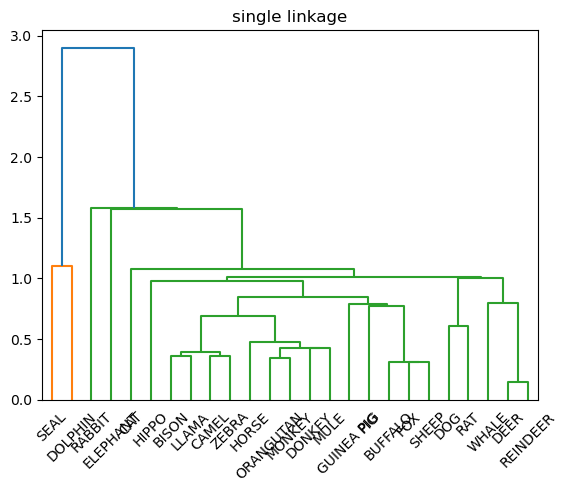

In [10]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
link = "single"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings,
           labels=list(df_scaled.index))
plt.title(link+" linkage")
plt.show()

In [13]:
clust = KMeans(n_clusters=3,random_state=24)
clust.fit(df_scaled)

print(clust.labels_)

[2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 2 1 1 1 1 1 0 0]


C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
df_clust = df.copy()
df_clust['Clust'] = clust.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)

In [21]:
df_clust.groupby('Clust').mean()

,water,protein,fat,lactose,ash
Clust,,,,,
0,45.650000,10.150000,38.450000,0.450000,0.690000
1,73.544444,9.733333,12.777778,2.855556,1.344444
2,85.814286,3.385714,4.700000,5.478571,0.578571


In [18]:
print(silhouette_score(df_scaled, clust.labels_))

Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = KMeans(n_clusters=i, random_state=24)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

0.39423075374986555


C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Best no. of clusters: 2
Best Score: 0.5258508931703421


C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 2 2 2 2 0 0 0 0 0 2 2 0 2 0 4 0 1 4 4 4 1 3 3]
[77.57590469 17.74794969  2.57838496  1.97162103  0.12613963]


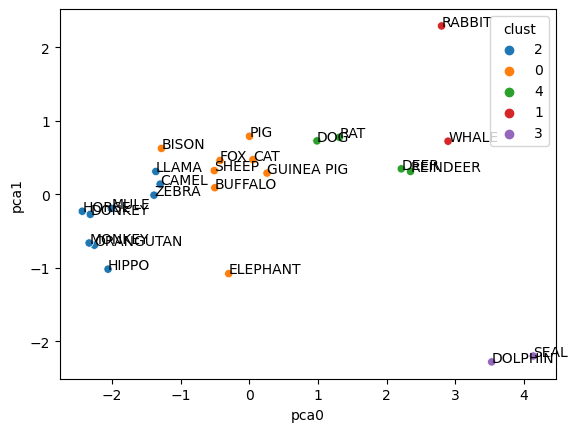

In [12]:
print(clust.labels_)
pca = PCA().set_output(transform='pandas')
prcomp= pca.fit_transform(df_scaled)

print(pca.explained_variance_ratio_ * 100)

prcomp['clust'] = clust.labels_
prcomp['clust'] = prcomp['clust'].astype(str)

sns.scatterplot(data=prcomp,
                x='pca0', y='pca1',hue='clust')
for i in np.arange(0,df.shape[0]):
    plt.text(prcomp.values[i,0],
             prcomp.values[i,1],
             list(df.index)[i])
plt.show()

In [11]:
clust_DB=DBSCAN(eps=1,min_samples=2)
clust_DB.fit(df_scaled)
print(clust_DB.labels_)

[ 0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  1 -1 -1  1  2  2  2 -1
 -1]


In [12]:
df_clust = df.copy()
df_clust['Clust'] = clust_DB.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)

In [20]:
df_clust.sort_values(by='Clust')


,water,protein,fat,lactose,ash,Clust
Animal,,,,,,
DOLPHIN,44.9,10.6,34.9,0.9,0.53,-1
RABBIT,71.3,12.3,13.1,1.9,2.30,-1
ELEPHANT,70.7,3.6,17.6,5.6,0.63,-1
SEAL,46.4,9.7,42.0,0.0,0.85,-1
CAT,81.6,10.1,6.3,4.4,0.75,-1
SHEEP,82.0,5.6,6.4,4.7,0.91,0
ZEBRA,86.2,3.0,4.8,5.3,0.70,0
PIG,82.8,7.1,5.1,3.7,1.10,0
LLAMA,86.5,3.9,3.2,5.6,0.80,0


In [23]:
df_clust.groupby('Clust').mean()

,water,protein,fat,lactose,ash
Clust,,,,,
-1,62.980000,9.260000,22.780000,2.560000,1.012
0,86.360000,3.886667,4.033333,5.166667,0.628
1,74.400000,9.250000,11.050000,3.150000,1.300
2,65.166667,10.733333,20.400000,2.233333,1.500
